# Importing libraries and models

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn import preprocessing
%matplotlib inline

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phonecalls. Often, more than one contact to the same client was required, inorder to access if the product (bank term deposit) would be ('yes') or not('no') subscribed by the customer or not. The data folder contains two datasets:- 45,211 rows and 17 columns.

# Data Injestion

In [2]:
df = pd.read_csv (r"E:\e drive\Data Analytics\BIA\Capstone Project\My Project/train.csv", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Checking for Null Values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values present in the dataset. However there are values like unknown and we will replace these values with "others". Also we will remove unnecessary data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.shape

(45211, 17)

In [8]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [10]:
df = df.drop(df[df['poutcome'] == "other"].index)

### Replacing the unknown to other in job and education columns for better analysis.

In [11]:
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

### Dropping contact column as it is not useful as we know that the marketing campaign was done through tele marketing method

In [12]:
df = df.drop('contact',axis=1)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43371.0,40.986443,10.595454,18.0,33.0,39.0,48.0,95.0
balance,43371.0,1356.963063,3030.956348,-8019.0,70.0,443.0,1417.0,102127.0
day,43371.0,15.862904,8.324122,1.0,8.0,16.0,21.0,31.0
duration,43371.0,258.266930,257.950498,0.0,103.0,180.0,318.0,4918.0
campaign,43371.0,2.776671,3.138053,1.0,1.0,2.0,3.0,63.0
pdays,43371.0,32.158954,90.689195,-1.0,-1.0,-1.0,-1.0,871.0
previous,43371.0,0.434853,1.559405,0.0,0.0,0.0,0.0,55.0


After describing the data, we see that there is outlier in the balance column and we fill try to handle the outlier with IQR method.

### As there is outlier in balance we are apply IQR method

In [14]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [15]:
lower_bound

-1950.5

In [16]:
upper_bound

3437.5

In [17]:
df['balance'].median()

443.0

### Relpacing the Outliers with Median

In [18]:
df['balance'] = df['balance'].apply(lambda x: df['balance'].median() if (x > upper_bound) else x)

In [19]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

### Applying correlation 

C:\Users\DELL\AppData\Local\Temp\ipykernel_8416\3596235070.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


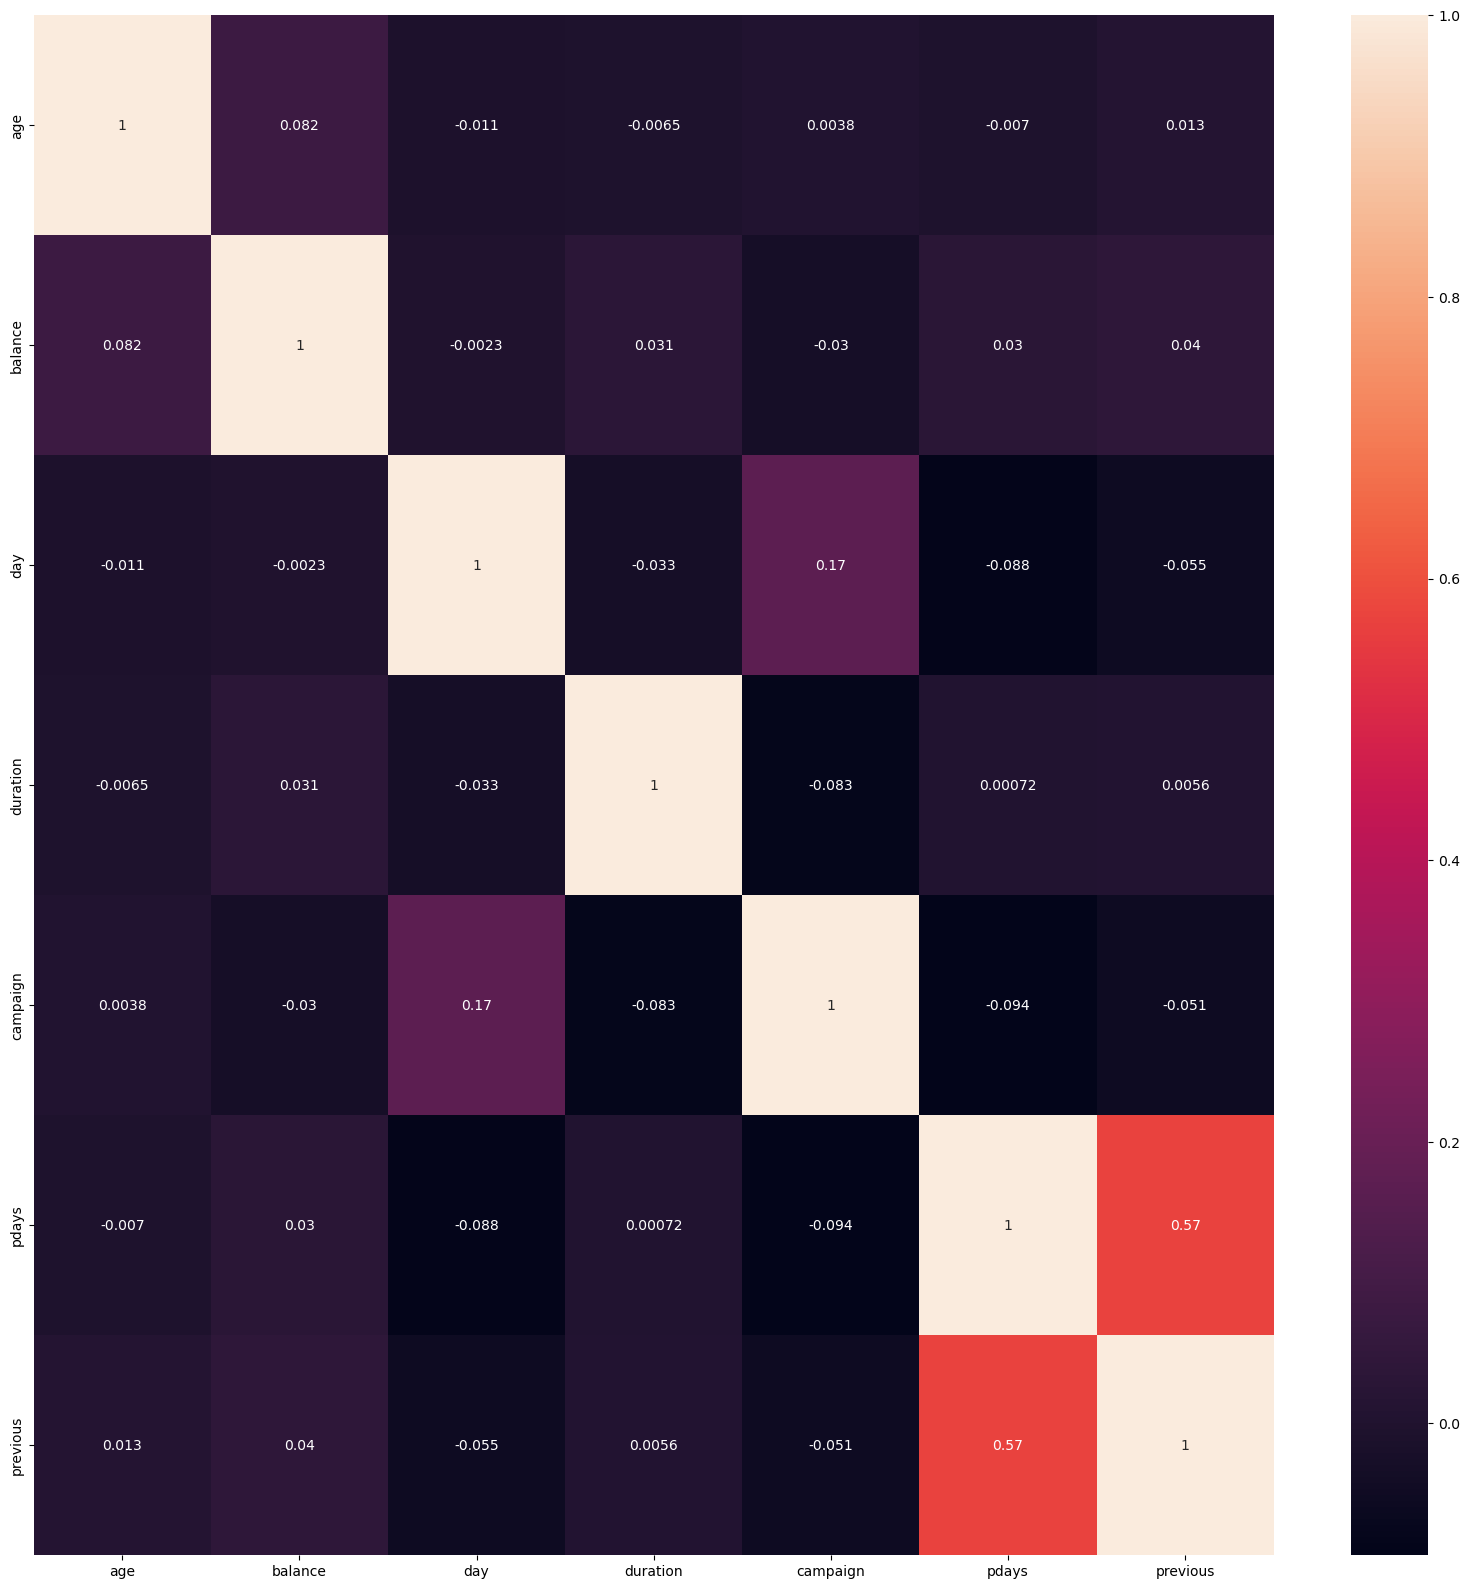

In [20]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(data = corr, annot = True,)
plt.show()

### Looking for Numeric and Categorical

In [21]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Display numeric columns
print("Numeric Columns:")
print(numeric_columns)


Numeric Columns:
       age  balance  day  duration  campaign  pdays  previous
0       58   2143.0    5       261         1     -1         0
1       44     29.0    5       151         1     -1         0
2       33      2.0    5        76         1     -1         0
3       47   1506.0    5        92         1     -1         0
4       33      1.0    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45205   25    505.0   17       386         2     -1         0
45206   51    825.0   17       977         3     -1         0
45207   71   1729.0   17       456         2     -1         0
45208   72    443.0   17      1127         5    184         3
45209   57    668.0   17       508         4     -1         0

[43371 rows x 7 columns]


In [22]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Display categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
                job   marital  education default housing loan month poutcome  \
0        management   married   tertiary      no     yes   no   may  unknown   
1        technician    single  secondary      no     yes   no   may  unknown   
2      entrepreneur   married  secondary      no     yes  yes   may  unknown   
3       blue-collar   married      other      no     yes   no   may  unknown   
4             other    single      other      no      no   no   may  unknown   
...             ...       ...        ...     ...     ...  ...   ...      ...   
45205    technician    single  secondary      no      no  yes   nov  unknown   
45206    technician   married   tertiary      no      no   no   nov  unknown   
45207       retired  divorced    primary      no      no   no   nov  unknown   
45208       retired   married  secondary      no      no   no   nov  success   
45209   blue-collar   married  secondary      no      no   no   nov  unknown   

         y  
0    

# Exploratory Data Analysis

## Visualize the distribution of 'age' and 'balance'

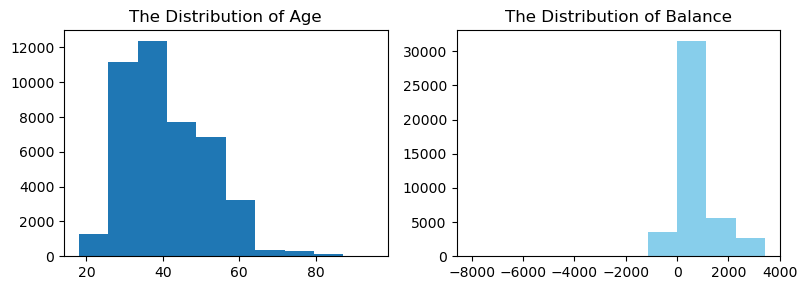

In [34]:
dist_age_balance = plt.figure(figsize = (8,3))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')
plt.tight_layout() 
plt.show()


Age: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 85 years old. However, a majority of customers called is in the age of 30s and 40s.

Balance: After dropping outliers in balance, the range of balance is still massive, the maximum people have balance between (0 to 1000)

## Visualize the relationship between 'age' and 'balance'

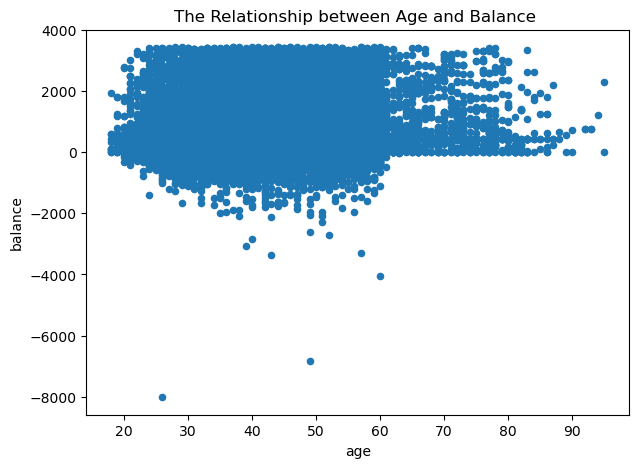

In [35]:
scatter_age_balance = df.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

From age 20 to 60 years people have balance around 0 to 3800. 


## Visualize balance with response (y)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


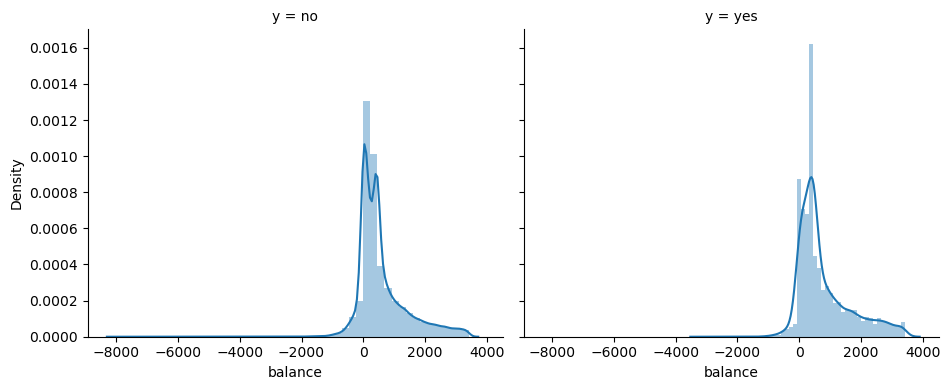

In [36]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.2)
g.map(sns.distplot,'balance')
plt.show()

People with balance of 0 to 2000 have subscribed to the term depoist and people who have not subscribed to the term depoist have balance 0. This maybe the reason that people have not subscribed to it.

## Countplot days

<Axes: xlabel='day', ylabel='count'>

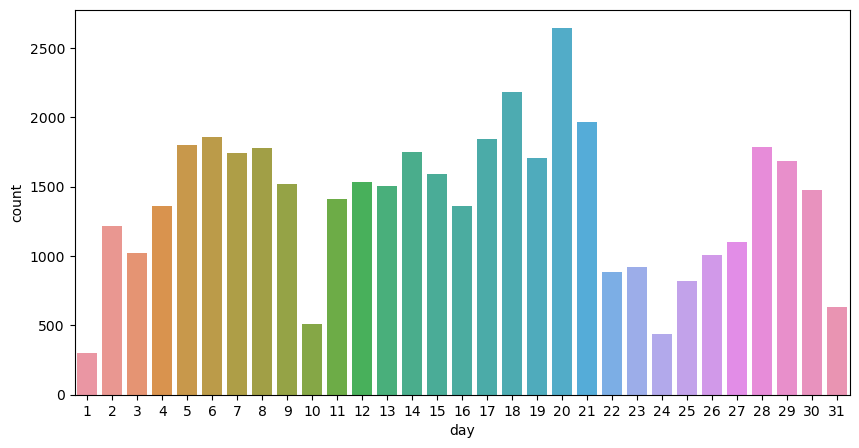

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df)

People are contacted most on 20th of every month and later on 18th and 21 respectively


## Visualize response (y) column 

<Axes: xlabel='y', ylabel='count'>

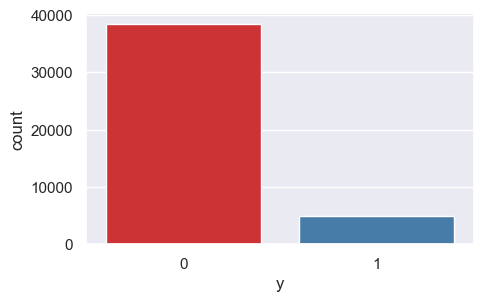

In [73]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,3))
sns.countplot(x='y',data=df,palette="Set1")

As we countplot the response(y) column we see that data is highly imbalanced and we would need to apply SMOTE technique to balance the data and increase the count of Yes(1). 

## Tranform categorical data into dummy variables

Since machine learning algorithms only take numerical values, all five categorical variables (default, housing, loan and y) with the help for labelencoding.
Applying ordinal mapping for column of months.
The categorical variables ('job','marital', 'education', 'poutcome') are transformed into dummy variables.

In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['y'] = label_encoder.fit_transform(df['y'])

In [40]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [41]:
ordinal_mapping = {'jan': 1, 'feb': 2, 'mar':3, 'apr': 4, 'may' :5, 'jun': 6, 'jul':7, 'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month'] = df['month'].map(ordinal_mapping)

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143.0,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,other,0,1506.0,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,single,other,0,1.0,0,0,5,5,198,1,-1,0,unknown,0


In [43]:
df_encoded = pd.get_dummies(df, columns=['job','marital', 'education', 'poutcome'])

In [44]:
pd.set_option('display.max_columns',None)
df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,44,0,29.0,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,33,0,2.0,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,0,1506.0,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,33,0,1.0,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In duration column the seconds are changed to minutes for better analysis

In [45]:
df_encoded['duration'] = df_encoded['duration'].apply(lambda n:n/60).round(2)

In [46]:
df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5,5,4.35,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,44,0,29.0,1,0,5,5,2.52,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,33,0,2.0,1,1,5,5,1.27,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,0,1506.0,1,0,5,5,1.53,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,33,0,1.0,0,0,5,5,3.30,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In [47]:
df_encoded.corr()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,-0.018257,0.081518,-0.185834,-0.017218,-0.011422,0.092276,-0.006464,0.003840,-0.007011,0.013018,0.024491,-0.056288,-0.043862,0.020988,0.086473,-0.024673,0.050329,0.444152,-0.007784,-0.065066,-0.193472,-0.070251,0.000998,0.162873,0.285590,-0.426492,0.069970,0.193438,-0.092443,-0.081706,-0.006747,0.035477,-0.012311
default,-0.018257,1.000000,-0.134128,-0.006160,0.078593,0.009054,0.015947,-0.011558,0.016853,-0.029581,-0.022700,-0.022466,-0.011248,0.010473,0.026080,-0.000379,-0.002108,-0.006925,-0.011125,0.004697,0.000436,-0.015755,-0.003871,0.006801,0.017302,-0.014437,0.003429,-0.000873,0.002044,0.012261,-0.014681,-0.027777,-0.024158,0.037256
balance,0.081518,-0.134128,1.000000,-0.055192,-0.092891,-0.002322,0.040035,0.031168,-0.030253,0.030049,0.040255,0.078268,-0.015750,-0.026219,-0.006426,-0.002734,0.036276,0.018707,0.049643,0.008989,-0.032023,0.014801,-0.015463,0.009392,-0.027327,0.021639,-0.004150,0.014607,-0.007546,-0.044895,0.048821,0.033053,0.062735,-0.061892
housing,-0.185834,-0.006160,-0.055192,1.000000,0.041028,-0.025973,-0.175019,0.009143,-0.025331,0.105883,0.035337,-0.134777,0.043638,0.176844,0.010331,-0.079223,-0.064519,-0.075503,-0.153899,-0.028404,0.069335,-0.081907,-0.012374,-0.048073,0.001157,0.017697,-0.020083,-0.047471,0.011151,0.102895,-0.100935,0.112139,-0.091711,-0.052643
loan,-0.017218,0.078593,-0.092891,0.041028,1.000000,0.011939,0.025387,-0.011326,0.010150,-0.020367,-0.018745,-0.066056,0.031372,0.017486,0.038770,-0.017252,-0.038995,-0.032578,-0.013482,-0.007944,0.036320,-0.057667,0.014030,-0.036051,0.017709,0.034230,-0.049831,-0.050242,-0.013648,0.072345,-0.046653,-0.002901,-0.055141,0.031075
day,-0.011422,0.009054,-0.002322,-0.025973,0.011939,1.000000,0.101954,-0.032635,0.168613,-0.088033,-0.054828,-0.033010,-0.009269,-0.023079,-0.002074,0.002459,0.018487,-0.011492,-0.011876,0.005593,-0.004605,-0.015614,0.032819,-0.008333,-0.000823,0.007340,-0.007406,-0.000450,-0.019519,-0.005134,0.021221,-0.072732,-0.032263,0.081542
month,0.092276,0.015947,0.040035,-0.175019,0.025387,0.101954,1.000000,-0.017356,0.057651,-0.091780,-0.023077,0.012821,-0.033359,-0.089030,0.025084,0.030095,0.084968,0.007896,0.021340,0.027571,-0.040884,-0.022811,0.039953,-0.042699,-0.000206,0.064428,-0.069980,-0.017040,-0.029241,-0.050456,0.085853,-0.062825,0.032468,0.039264
duration,-0.006464,-0.011558,0.031168,0.009143,-0.011326,-0.032635,-0.017356,1.000000,-0.082664,0.000713,0.005559,0.397164,-0.016071,0.010895,-0.002298,-0.008274,-0.009294,-0.006388,0.024517,0.007384,0.000392,-0.005553,-0.007899,0.021370,0.006825,-0.024652,0.021987,0.000492,-0.004490,0.003290,-0.000283,-0.019483,0.043161,-0.004920
campaign,0.003840,0.016853,-0.030253,-0.025331,0.010150,0.168613,0.057651,-0.082664,1.000000,-0.093630,-0.051453,-0.072548,-0.021898,0.007848,0.000997,0.002634,0.017989,0.014241,-0.030728,0.006757,-0.005240,-0.023420,0.021346,-0.018387,-0.015987,0.031579,-0.023021,0.005582,0.009049,-0.021663,0.014190,-0.090523,-0.058764,0.111102
pdays,-0.007011,-0.029581,0.030049,0.105883,-0.020367,-0.088033,-0.091780,0.000713,-0.093630,1.000000,0.569136,0.110407,0.026497,0.010779,-0.008635,-0.026242,-0.002906,-0.010792,0.001049,-0.010467,0.000518,0.015624,-0.012447,-0.005217,0.001314,-0.017488,0.018101,-0.004186,-0.017249,0.016070,-0.002197,0.823957,0.274654,-0.876832


In [48]:
df_encoded.shape

(43371, 34)

## As the data is inbalanced we are applying SMOTE 

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create a sample dataset with class imbalance
X, y = df_encoded.drop('y', axis =1),df_encoded.y 

# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Initialize SMOTE with a 50% oversampling rate
oversampler = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust the random_state as needed

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0: 38389, 1: 4982})
Class distribution after SMOTE: Counter({0: 38389, 1: 19194})


In [50]:
y_resampled.head ()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

## Visualize response (y) after applying SMOTE

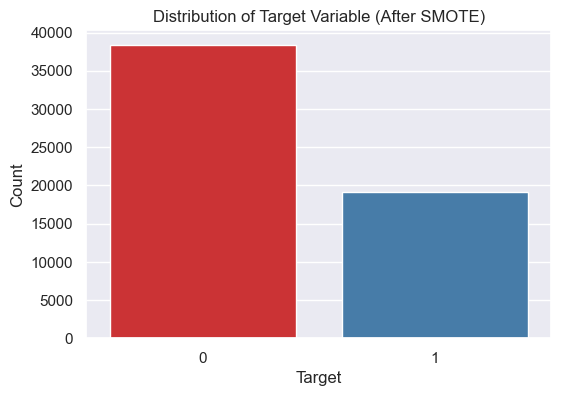

In [51]:
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4)) 
sns.countplot(x=y_resampled, palette="Set1") 
plt.title("Distribution of Target Variable (After SMOTE)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [52]:
y_resampled.value_counts()

0    38389
1    19194
Name: y, dtype: int64

After applying SMOTE with 50% sampling, we have increased the 'yes' data it is now 19194.

In [53]:
X = X_resampled
y = y_resampled 

## Feature selection

The values of the first 30 columns are selected as features while the value of the last column,'y' is set as target.

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [55]:
feature_importances = model.feature_importances_

In [56]:
sorted_indices = np.argsort(feature_importances)[::-1]
top_feature_indices = sorted_indices[:30]

In [57]:
df_final = X.iloc[:, top_feature_indices]

In [59]:
df_final.head()

,duration,housing,marital_divorced,month,poutcome_unknown,age,day,marital_single,balance,marital_married,poutcome_failure,campaign,education_tertiary,education_other,education_primary,poutcome_success,education_secondary,loan,pdays,job_technician,job_management,job_blue-collar,job_admin.,previous,job_services,job_retired,job_unemployed,job_self-employed,job_entrepreneur,job_housemaid
0,4.35,1,0,5,1,58,5,0,2143.0,1,0,1,1,0,0,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0
1,2.52,1,0,5,1,44,5,1,29.0,0,0,1,0,0,0,0,1,0,-1,1,0,0,0,0,0,0,0,0,0,0
2,1.27,1,0,5,1,33,5,0,2.0,1,0,1,0,0,0,0,1,1,-1,0,0,0,0,0,0,0,0,0,1,0
3,1.53,1,0,5,1,47,5,0,1506.0,1,0,1,0,1,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,0,0
4,3.30,0,0,5,1,33,5,1,1.0,0,0,1,0,1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0


## Train/ test split

In [60]:
from sklearn.model_selection import train_test_split
X = df_final
y = y_resampled   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Applying Classification Algorithms

Four different classification algorithms (Logistic Regression, GradientBoostingClassifier, XGBClassifier, K-Neighbors Classifier) are run on the dataset and the best-performing one will be used to build the classification model.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Create a logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print("cm1:", cm1)


Accuracy: 0.8370235304332726
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7702
           1       0.80      0.68      0.73      3815

    accuracy                           0.84     11517
   macro avg       0.83      0.80      0.81     11517
weighted avg       0.83      0.84      0.83     11517

Precision: 0.8343788177074801
Recall: 0.8370235304332726
cm1: [[7049  653]
 [1224 2591]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

# Calculate accuracy on training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.8346068684061998
0.8370235304332726


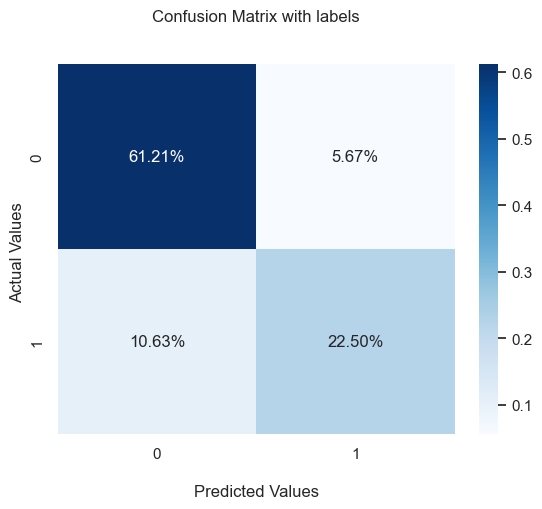

In [63]:
ax = sns.heatmap(cm1/np.sum(cm1), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10)
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

cm2 = confusion_matrix(y_test, y_pred)
print("cm2:", cm2)

Accuracy: 0.9141269427802379
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7702
           1       0.89      0.85      0.87      3815

    accuracy                           0.91     11517
   macro avg       0.91      0.90      0.90     11517
weighted avg       0.91      0.91      0.91     11517

Precision: 0.9135435666270582
Recall: 0.9141269427802379
cm2: [[7300  402]
 [ 587 3228]]


In [65]:
y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

# Calculate accuracy on training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.9115399643989059
0.9141269427802379


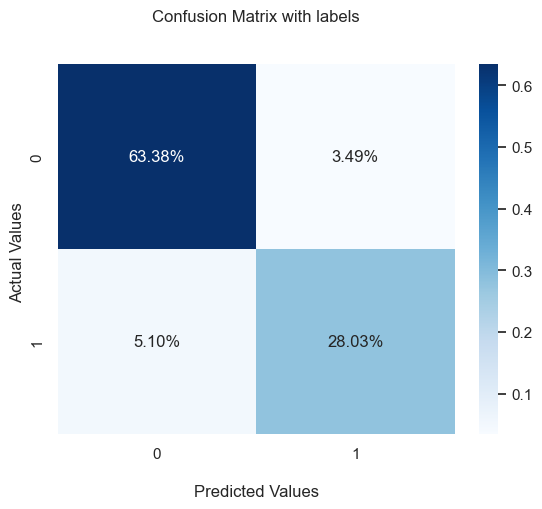

In [66]:
ax = sns.heatmap(cm2/np.sum(cm2), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [67]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

cm3 = confusion_matrix(y_test, y_pred)
print("cm3:", cm3)

Accuracy: 0.9274984805070765
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7702
           1       0.90      0.87      0.89      3815

    accuracy                           0.93     11517
   macro avg       0.92      0.91      0.92     11517
weighted avg       0.93      0.93      0.93     11517

Precision: 0.9271224355926271
Recall: 0.9274984805070765
cm3: [[7346  356]
 [ 479 3336]]


In [68]:
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)

# Calculate accuracy on training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.9594277775365779
0.9274984805070765


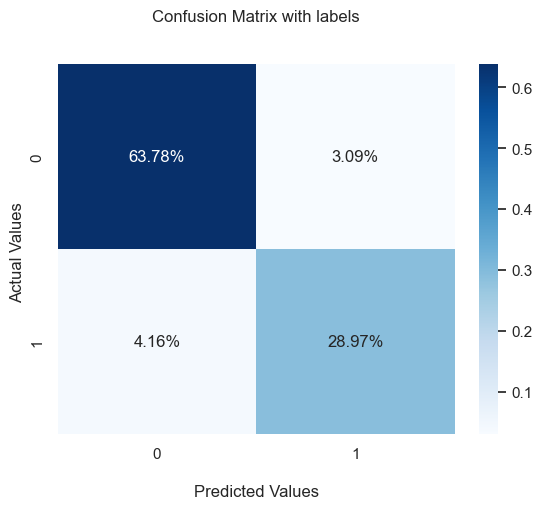

In [69]:
ax = sns.heatmap(cm3/np.sum(cm3), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with a specified value of k (e.g., k=3)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

cm4 = confusion_matrix(y_test, y_pred)
print("cm4:", cm4)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7702
           1       0.78      0.91      0.84      3815

    accuracy                           0.88     11517
   macro avg       0.87      0.89      0.87     11517
weighted avg       0.89      0.88      0.89     11517

Precision: 0.8947032656411033
Recall: 0.8846921941477816
cm4: [[6708  994]
 [ 334 3481]]


In [71]:
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy on training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.9416055225111796
0.8846921941477816


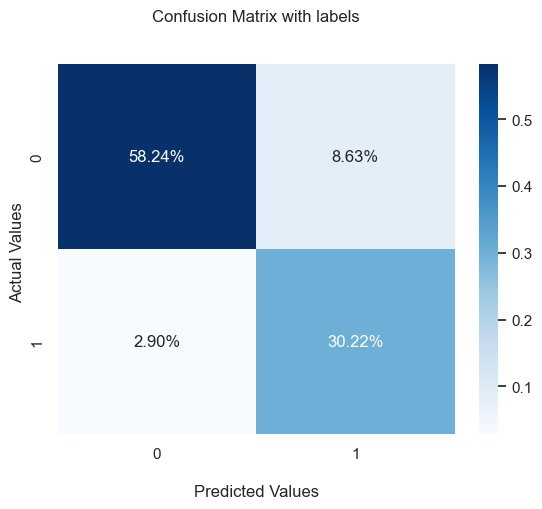

In [72]:
ax = sns.heatmap(cm4/np.sum(cm4), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

## Conclusion

With XGBClassifier algorithms, classification and estimation model were successfully built. With this models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.